### Imports necessary for running the program

In [20]:
# -*- coding: utf-8 -*-
"""
Created on Sun May  5 23:01:42 2019

@author: Ahmed
"""
from openpyxl import load_workbook
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import pandas as pd
'''df = pd.read_excel("MLDataSet.xlsx")
df2 = pd.read_excel("ADRs.xlsx")
df3 = pd.read_excel("DS.xlsx")
df4 = pd.read_excel("Mental.xlsx")

df5=[df, df2,  df3, df4]

result = pd.concat([df,df2,df3, df4], axis=1, join_axes=[df.index])'''
#result.to_excel('result.xlsx')


'df = pd.read_excel("MLDataSet.xlsx")\ndf2 = pd.read_excel("ADRs.xlsx")\ndf3 = pd.read_excel("DS.xlsx")\ndf4 = pd.read_excel("Mental.xlsx")\n\ndf5=[df, df2,  df3, df4]\n\nresult = pd.concat([df,df2,df3, df4], axis=1, join_axes=[df.index])'

In [2]:
def removeColumns(result):
    del result['Pain']
    del result['Content']
    del result['Filtered']
    del result['Stemmed']
    del result['big1']
    del result['big2']
    del result['small1']
    del result['small2']
    del result['Height']
    del result['Joined']
    del result['Posted']
    

In [3]:
def vectorizeCount(result):
    '''for i in range(len(result)):
        if result[i]==0:
            result[i]=0
        if result[i]>0 and result[i]<=3:
            result[i]=1
        if result[i]>3:
            result[i]=2'''
    for i in range(len(result)):
        if result.at[i,'MentalCount']==0:
            result.at[i,'MentalCount']=0
        if result.at[i,'MentalCount']>0 and result.at[i,'MentalCount']<=3:
            result.at[i,'MentalCount']=1
        if result.at[i,'MentalCount']>3:
            result.at[i,'MentalCount']=2
            
        if result.at[i,'ADRCount']==0:
            result.at[i,'ADRCount']=0
        if result.at[i,'ADRCount']>0 and result.at[i,'MentalCount']<=3:
            result.at[i,'ADRCount']=1
        if result.at[i,'ADRCount']>3:
            result.at[i,'ADRCount']=2

        if result.at[i,'DieaseCount']==0:
            result.at[i,'DieaseCount']=0
        if result.at[i,'DieaseCount']>0 and result.at[i,'DieaseCount']<=3:
            result.at[i,'DieaseCount']=1
        if result.at[i,'DieaseCount']>3:
            result.at[i,'DieaseCount']=2
    return result

### manipulating data to prepare for classification

In [4]:
def manipulate(result,labelfile,label):
    from collections import Counter
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    result['Gender']=imp_mean.fit_transform(result['Gender'].values.reshape(-1, 1))
    for i in range(len(result)):
        if result.at[i,'Gender']=='Male':
            result.at[i,'Gender']=0
        if result.at[i,'Gender']=='Female':
            result.at[i,'Gender']=1
    
    labels=labelfile.iloc[:][label]
    print(Counter(labels))
    labels=LabelEncoder().fit_transform(labels)
    if 'Unnamed: 0' in result:
        del result['Unnamed: 0'] 
    #removeColumns(result)
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
    result['Age']=imp_mean.fit_transform(result['Age'].values.reshape(-1, 1))
    if 'Height' in result:
        result['Height']=imp_mean.fit_transform(result['Height'].values.reshape(-1, 1))
    result=vectorizeCount(result)
    return result,labels

In [5]:

#asklabel=pd.read_excel('asklabels.xlsx')
#labels=asklabel.iloc[:]['MICROCEPHALY , EPILEPSY , AND DIABETES SYNDROME']

In [6]:

def SMOTE(begin,columns):
    from imblearn.over_sampling import SMOTENC
    x=[1]
    x.extend(list(range(begin,len(columns))))
    sm=SMOTENC(random_state=42, categorical_features=x)
    return sm


### Datasets

In [7]:
label='ADRCount'
asklabel='ADRCount'

#from collections import Counter
#X_res, y_res = sm.fit_resample(result, result_labels)
#print(Counter(result_labels))
#print(Counter(y_res))
def prepareDataset(label,asklab):
    from imblearn.over_sampling import SMOTENC
    
    
    
    result=pd.read_excel('result_reduced.xlsx')
    weighted=pd.read_excel('Weighted_reduced.xlsx')
    blood=pd.read_excel('blood_reduced.xlsx')
    ask=pd.read_excel('askapatient_reduced.xlsx')

    resultlabel=pd.read_excel('resultlabels.xlsx')
    weightedlabel=pd.read_excel('Weightedlabels.xlsx')
    bloodlabel=pd.read_excel('bloodlabels.xlsx')
    asklabel=pd.read_excel('asklabels.xlsx')

    result,result_labels=manipulate(result,resultlabel,label)
    weighted,weighted_labels=manipulate(weighted,weightedlabel,label)
    blood,blood_labels=manipulate(blood,bloodlabel,label)
    ask,ask_labels=manipulate(ask,asklabel,asklab)
    del result['weights2']
    del result['Height']
    
    sm1 = SMOTE(2,result.columns)
    sm2 = SMOTE(4,weighted.columns)
    sm3 = SMOTE(4,blood.columns)
    sm4 = SMOTE(2,ask.columns)
    #Applying SMOTENC
    result,result_labels=sm1.fit_resample(result,result_labels)
    weighted,weighted_labels=sm2.fit_resample(weighted,weighted_labels)
    blood,blood_labels=sm3.fit_resample(blood,blood_labels)
    ask,ask_labels=sm4.fit_resample(ask,ask_labels)
    return result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels


In [8]:
label='ADRCount'
asklabel='ADRCount'

#from collections import Counter
#X_res, y_res = sm.fit_resample(result, result_labels)
#print(Counter(result_labels))
#print(Counter(y_res))
def prepareDatasetNoSmote(label,asklab):
    
    result=pd.read_excel('result_reduced.xlsx')
    weighted=pd.read_excel('Weighted_reduced.xlsx')
    blood=pd.read_excel('blood_reduced.xlsx')
    ask=pd.read_excel('askapatient_reduced.xlsx')

    resultlabel=pd.read_excel('resultlabels.xlsx')
    weightedlabel=pd.read_excel('Weightedlabels.xlsx')
    bloodlabel=pd.read_excel('bloodlabels.xlsx')
    asklabel=pd.read_excel('asklabels.xlsx')

    result,result_labels=manipulate(result,resultlabel,label)
    weighted,weighted_labels=manipulate(weighted,weightedlabel,label)
    blood,blood_labels=manipulate(blood,bloodlabel,label)
    ask,ask_labels=manipulate(ask,asklabel,asklab)
    if 'Count' in label:
        result_labels = vectorizeCount(result_labels)
        weighted_labels = vectorizeCount(weighted_labels)
        blood_labels=vectorizeCount(blood_labels)
    if 'Count' in asklab:
        ask_labels = vectorizeCount(ask_labels)
    del result['weights2']
    del result['Height']
    
    
    #Applying SMOTENC
    #result,result_labels=sm.fit_resample(result,result_labels)
    #weighted,weighted_labels=sm.fit_resample(weighted,weighted_labels)
    #blood,blood_labels=sm.fit_resample(blood,blood_labels)
    #ask,ask_labels=sm.fit_resample(ask,ask_labels)
    return result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels


In [9]:
'''for i in weighted:
    if i not in result:
        if i != 'weights2':
            del weighted[i]
weighted.to_excel('Weighted.xlsx')'''

"for i in weighted:\n    if i not in result:\n        if i != 'weights2':\n            del weighted[i]\nweighted.to_excel('Weighted.xlsx')"

In [10]:
#ask_labels

In [11]:
'''for i in weighted:
    print (weighted[i])'''

'for i in weighted:\n    print (weighted[i])'

In [12]:
def get_score(model, X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)

### 10-Fold Cross validation

In [14]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_fscore
np.average( cross_val_score(RandomForestClassifier(n_estimators=200),result,result_labels,cv=50))'''

'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.model_selection import cross_val_fscore\nnp.average( cross_val_score(RandomForestClassifier(n_estimators=200),result,result_labels,cv=50))'

In [15]:
#This was used for some other no longer existing purposes
def getMissingPercentage(feature):
    #nancount = int(result[result[feature].isnull()][feature].shape[0])
    nancount = int(result[result[feature]==1][feature].shape[0])
    size=int(result.shape[0])
    print (nancount)
    print ((nancount*100)/size)
#getMissingPercentage('Pvc')

In [16]:
def importance(result,result_labels):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectFromModel
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    X_train, X_test, Y_train, Y_test = pd.DataFrame(X_train),pd.DataFrame(X_test),pd.DataFrame(Y_train),pd.DataFrame(Y_test),
    #print(Counter(result_labels))
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 500))
    sel.fit(X_train, Y_train)
    #print(sel.get_support())
    selected_feat= X_train.columns[(sel.get_support())]
    #print(len(selected_feat))
    #print(selected_feat)


    return selected_feat

In [16]:
'''label='Drug'
asklabel='Drug'

result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)'''



"label='Drug'\nasklabel='Drug'\n\nresult,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)\nres_feat=importance(result,result_labels)\nwei_feat=importance(weighted,weighted_labels)\nblood_feat=importance(blood,blood_labels)\nask_feat=importance(ask,ask_labels)"

In [17]:
def plotResult(name,max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots()
    width = 0.2

    acc_m = (max_res['Accuracy'][x1],max_wei['Accuracy'][x2],max_bld['Accuracy'][x3],max_ask['Accuracy'][x4])
    pre_m = (max_res['Precision'][x1],max_wei['Precision'][x2],max_bld['Precision'][x3],max_ask['Precision'][x4])
    rec_m = (max_res['Recall'][x1],max_wei['Recall'][x2],max_bld['Recall'][x3],max_ask['Recall'][x4])
    fse_m = (max_res['FScore'][x1],max_wei['FScore'][x2],max_bld['FScore'][x3],max_ask['FScore'][x4])

    ind = np.arange(len(acc_m)) 
    old_ind =  ind
    rects1 = ax.bar(ind,acc_m, width=width ,label='accuracy')
    ind = ind + width
    rects2 = ax.bar(ind,pre_m, width=width,label='Precision')
    ind = ind + width
    rects3 = ax.bar(ind,rec_m, width=width,label='recall')
    ind = ind + width
    rects4 = ax.bar(ind,fse_m, width=width ,label='fscore')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(name)
    ax.set_xticks(old_ind+ width *2)
    ax.set_xticklabels(('complete', 'weighted', 'pressure', 'ask'))
    box = ax.get_position()
    ax.set_position([box.x0, box.y0,box.width, box.height * 0.6])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True,shadow=True, ncol=4)
    fig.tight_layout()
    plt.show()

In [17]:
#pd.DataFrame(weighted)[wei_feat]

In [18]:
'''from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=10)

scores_rf=[]

for train_index, test_index in kf.split(result):
    X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=400),X_train, X_test, Y_train, Y_test))'''

'from sklearn.model_selection import KFold\nfrom sklearn.ensemble import RandomForestClassifier\nkf = KFold(n_splits=10)\n\nscores_rf=[]\n\nfor train_index, test_index in kf.split(result):\n    X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]\n    scores_rf.append(get_score(RandomForestClassifier(n_estimators=400),X_train, X_test, Y_train, Y_test))'

### Random Forest Classifier Function 

In [18]:
def randomForest(result,result_labels,estimators,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    print(Counter(result_labels))
    clf = RandomForestClassifier(n_estimators=estimators,random_state=0)
    clf.fit(X_train, Y_train)
    pred=clf.predict(X_test)
    accuracy=(accuracy_score(Y_test, pred))
    #print (accuracy)
    scores_rf=(precision_recall_fscore_support(Y_test,pred, average='macro'))
    #print(DataSet)
    #print (pred)
    #print(classification_report(Y_test,pred,labels=[0,1,2]))
        
    return accuracy,scores_rf

### Random Forest With Smote

100
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.532258064516129 # Scores: (0.5274187051505063, 0.5336865809113508, 0.5294807132566177, None)
Wei: Accuracy: 0.6129032258064516 # Scores: (0.6031746031746033, 0.614390756302521, 0.6046644088669951, None)
Bld: Accuracy: 0.6164874551971327 # Scores: (0.607253837684224, 0.6197660818713451, 0.6115274728278199, None)
Ask: Accuracy: 0.7994652406417112 # Scores: (0.8002863688430699, 0.8000028609847509, 0.799452336862877, None)
200
Counter({'

Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.5259856630824373 # Scores: (0.5211607584692192, 0.5272502426646841, 0.5230874401122513, None)
Wei: Accuracy: 0.6290322580645161 # Scores: (0.6141825151113077, 0.6290966386554622, 0.6179308579197345, None)
Bld: Accuracy: 0.6129032258064516 # Scores: (0.6050995458600276, 0.6166276803118909, 0.6082058447071086, None)
Ask: Accuracy: 0.8021390374331551 # Scores: (0.8031514109726401, 0.8027351014219095, 0.8021164021164022, None)


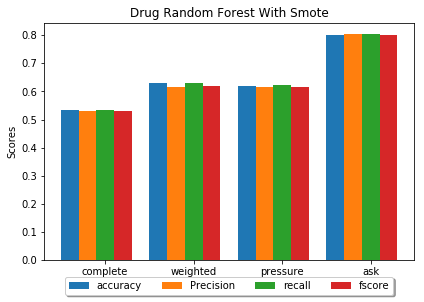

In [24]:
label='Drug'
asklabel='Drug'
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
    res_acc,res_scores=randomForest(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(ask,ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''
x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest With Smote",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)

import os.path
if not os.path.exists('Forrest_StatsTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

### Random Forest With Importance Filtering

100
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.3118279569892473 # Scores: (0.3151686220826117, 0.3127924656877049, 0.31116772200509124, None)
Wei: Accuracy: 0.6451612903225806 # Scores: (0.6156954887218045, 0.6523371848739495, 0.6157919221919717, None)
Bld: Accuracy: 0.5878136200716846 # Scores: (0.5772442244018695, 0.5896003898635478, 0.5796191598936657, None)
Ask: Accuracy: 0.8288770053475936 # Scores: (0.8393965491640187, 0.8269676422624668, 0.8268969307761289, None)
200
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.31451612903225806 # Scores: (0.3175477425149616, 0.3155503464699486, 0.3132515298274383, None)
Wei: Accuracy: 0.6451612903225806 # Scores: (0.6079398864809081, 0.6523371848739495, 0.6180555555555556, None)
Bld: Accuracy: 0.5913978494623656 # Scores: (0.5821821036106749, 0.5939424951267056, 0.5817597866537285, None)
Ask: Accuracy: 0.8262032085561497 # Scores: (0.8359708392603129, 0.8243498412153463, 0.8242925806801344, None)
300
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.31451612903225806 # Scores: (0.3171783685021332, 0.315555242670497, 0.3130143988390191, None)
Wei: Accuracy: 0.6451612903225806 # Scores: (0.6079398864809081, 0.6523371848739495, 0.6180555555555556, None)
Bld: Accuracy: 0.5842293906810035 # Scores: (0.5734457013917283, 0.5873684210526315, 0.5733179008239541, None)
Ask: Accuracy: 0.8262032085561497 # Scores: (0.8359708392603129, 0.8243498412153463, 0.8242925806801344, None)
400
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.3118279569892473 # Scores: (0.3148526079977057, 0.3128537381402817, 0.31058716534842573, None)
Wei: Accuracy: 0.6612903225806451 # Scores: (0.6480493191019507, 0.6681109943977591, 0.6486892736892736, None)
Bld: Accuracy: 0.5878136200716846 # Scores: (0.576587168665282, 0.590701754385965, 0.5762683534952443, None)
Ask: Accuracy: 0.8262032085561497 # Scores: (0.8359708392603129, 0.8243498412153463, 0.8242925806801344, None)
500
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.3154121863799283 # Scores: (0.3185621289934254, 0.3163488535470293, 0.31389469425294186, None)
Wei: Accuracy: 0.6612903225806451 # Scores: (0.6480493191019507, 0.6681109943977591, 0.6486892736892736, None)
Bld: Accuracy: 0.5949820788530465 # Scores: (0.5863394028324329, 0.5972758284600389, 0.5859858826458663, None)
Ask: Accuracy: 0.8262032085561497 # Scores: (0.8359708392603129, 0.8243498412153463, 0.8242925806801344, None)
600
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.3154121863799283 # Scores: (0.3180530039349226, 0.3163814574863491, 0.31367696409172763, None)
Wei: Accuracy: 0.6612903225806451 # Scores: (0.6351049191606468, 0.6679621848739495, 0.6416039426523298, None)
Bld: Accuracy: 0.5949820788530465 # Scores: (0.5847822225838921, 0.5970808966861598, 0.583841953909696, None)
Ask: Accuracy: 0.8262032085561497 # Scores: (0.8359708392603129, 0.8243498412153463, 0.8242925806801344, None)
700
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.3154121863799283 # Scores: (0.3181740584811839, 0.31635374974757763, 0.31371568709587705, None)
Wei: Accuracy: 0.6612903225806451 # Scores: (0.6438159793422952, 0.6681109943977591, 0.6486869412515964, None)
Bld: Accuracy: 0.5913978494623656 # Scores: (0.5829153332543162, 0.5931091617933724, 0.5823535513592776, None)
Ask: Accuracy: 0.8262032085561497 # Scores: (0.8359708392603129, 0.8243498412153463, 0.8242925806801344, None)
800
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.3342293906810036 # Scores: (0.3320379476828122, 0.33490643714531165, 0.3315934403882476, None)
Wei: Accuracy: 0.6612903225806451 # Scores: (0.6348039215686274, 0.6679621848739495, 0.6407142857142857, None)
Bld: Accuracy: 0.5842293906810035 # Scores: (0.5742032120421952, 0.5860721247563353, 0.5745858288856728, None)
Ask: Accuracy: 0.8288770053475936 # Scores: (0.8369126528207395, 0.8271965210425429, 0.8272766632991775, None)
900
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.3378136200716846 # Scores: (0.3368563984329092, 0.33850040544516236, 0.3359646061138261, None)
Wei: Accuracy: 0.6612903225806451 # Scores: (0.6480493191019507, 0.6681109943977591, 0.6486892736892736, None)
Bld: Accuracy: 0.5878136200716846 # Scores: (0.5766196000020614, 0.5895808966861599, 0.5770596315214812, None)
Ask: Accuracy: 0.8262032085561497 # Scores: (0.8359708392603129, 0.8243498412153463, 0.8242925806801344, None)


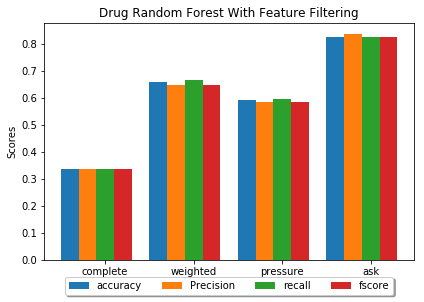

In [25]:
label='Drug'
asklabel='Drug'
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
    res_feat=importance(result,result_labels)
    wei_feat=importance(weighted,weighted_labels)
    blood_feat=importance(blood,blood_labels)
    ask_feat=importance(ask,ask_labels)
    res_acc,res_scores=randomForest(pd.DataFrame(result)[res_feat],result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(pd.DataFrame(weighted)[wei_feat],weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(pd.DataFrame(blood)[blood_feat],blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(pd.DataFrame(ask)[ask_feat],ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''
x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest With Feature Filtering",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)

import os.path
if not os.path.exists('Forrest_StatsImportanceTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsImportanceTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsImportanceTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsImportanceTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()


### Random Forest Without Smote

100
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.3055555555555556 # Scores: (0.1830162210618924, 0.1877610513191222, 0.18294342166741184, None)
Wei: Accuracy: 0.4864864864864865 # Scores: (0.265625, 0.3375, 0.29707792207792205, None)
Bld: Accuracy: 0.3695652173913043 # Scores: (0.2984892300681774, 0.2624586363716798, 0.25506949191159717, None)
Ask: Accuracy: 0.7665198237885462 # Scores: (0.5437975347495411, 0.5599425699928212, 0.5471108601543384, None)
200
Counter({'Atenolol': 620, 'L

Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.3076923076923077 # Scores: (0.18374439880720705, 0.1863117204734659, 0.18181003525254683, None)
Wei: Accuracy: 0.4594594594594595 # Scores: (0.2583333333333333, 0.31666666666666665, 0.2845117845117845, None)
Bld: Accuracy: 0.36231884057971014 # Scores: (0.2897566810596336, 0.2581108102847233, 0.2502266844458389, None)
Ask: Accuracy: 0.7841409691629956 # Scores: (0.5554765291607398, 0.5699928212491027, 0.5600949179355349, None)


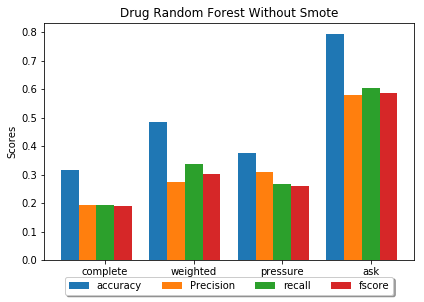

In [26]:
label='Drug'
asklabel='Drug'
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
    res_acc,res_scores=randomForest(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(ask,ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''

x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest Without Smote",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)


import os.path
if not os.path.exists('Forrest_StatsSmotelessTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsSmotelessTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsSmotelessTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsSmotelessTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

### Random Forest With Importance Filtering and Without Smote

100
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.3333333333333333 # Scores: (0.23483491292957312, 0.21227430914110704, 0.21088343660003803, None)
Wei: Accuracy: 0.43243243243243246 # Scores: (0.2957983193277311, 0.3291666666666667, 0.3086206896551724, None)
Bld: Accuracy: 0.34057971014492755 # Scores: (0.23772910188403146, 0.24122737166215424, 0.2304187120931307, None)
Ask: Accuracy: 0.8061674008810573 # Scores: (0.5518664752333093, 0.5518664752333093, 0.5518664752333093, None)
200
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.344017094017094 # Scores: (0.23297433346536486, 0.21364848632729208, 0.20917717927261828, None)
Wei: Accuracy: 0.43243243243243246 # Scores: (0.3177083333333333, 0.36250000000000004, 0.3365987460815047, None)
Bld: Accuracy: 0.3333333333333333 # Scores: (0.24312573443008226, 0.23765992461644636, 0.22989323786667093, None)
Ask: Accuracy: 0.7929515418502202 # Scores: (0.5406517445687953, 0.5443287867910983, 0.5422012443681613, None)
300
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.34615384615384615 # Scores: (0.22059604564848798, 0.21569565631245421, 0.2080620013031572, None)
Wei: Accuracy: 0.43243243243243246 # Scores: (0.3177083333333333, 0.36250000000000004, 0.3365987460815047, None)
Bld: Accuracy: 0.32608695652173914 # Scores: (0.23200604331039115, 0.23253171948824125, 0.22323635174893758, None)
Ask: Accuracy: 0.7929515418502202 # Scores: (0.5406517445687953, 0.5443287867910983, 0.5422012443681613, None)
400
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.3418803418803419 # Scores: (0.24351237328043415, 0.21061414339793605, 0.20732007833474184, None)
Wei: Accuracy: 0.43243243243243246 # Scores: (0.24812030075187969, 0.3, 0.26696329254727474, None)
Bld: Accuracy: 0.3333333333333333 # Scores: (0.23295429208472687, 0.23687954557519775, 0.22575923271575443, None)
Ask: Accuracy: 0.7929515418502202 # Scores: (0.5406517445687953, 0.5443287867910983, 0.5422012443681613, None)
500
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.33974358974358976 # Scores: (0.2288067079111166, 0.20725676635289494, 0.20190906062055583, None)
Wei: Accuracy: 0.43243243243243246 # Scores: (0.3177083333333333, 0.36250000000000004, 0.3365987460815047, None)
Bld: Accuracy: 0.32608695652173914 # Scores: (0.2215284062342886, 0.23175134044699258, 0.21924532683153375, None)
Ask: Accuracy: 0.7797356828193832 # Scores: (0.5312404754647974, 0.5367910983488873, 0.5329986833443054, None)
600
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.3482905982905983 # Scores: (0.23886601189878556, 0.21541215475762718, 0.20979932069267146, None)
Wei: Accuracy: 0.43243243243243246 # Scores: (0.24812030075187969, 0.3, 0.26696329254727474, None)
Bld: Accuracy: 0.32608695652173914 # Scores: (0.22118632502264218, 0.23175134044699258, 0.21938315265546388, None)
Ask: Accuracy: 0.7797356828193832 # Scores: (0.5312404754647974, 0.5367910983488873, 0.5329986833443054, None)
700
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.3482905982905983 # Scores: (0.22061489708548535, 0.21336711367059136, 0.20401709207544527, None)
Wei: Accuracy: 0.43243243243243246 # Scores: (0.24812030075187969, 0.3, 0.26696329254727474, None)
Bld: Accuracy: 0.3188405797101449 # Scores: (0.21801619433198377, 0.22740351436003609, 0.21604516341358443, None)
Ask: Accuracy: 0.7797356828193832 # Scores: (0.5312404754647974, 0.5367910983488873, 0.5329986833443054, None)
800
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.3418803418803419 # Scores: (0.22978783959785054, 0.21140132130945777, 0.20510178412477265, None)
Wei: Accuracy: 0.43243243243243246 # Scores: (0.24812030075187969, 0.3, 0.26696329254727474, None)
Bld: Accuracy: 0.3188405797101449 # Scores: (0.21586770717205503, 0.22740351436003609, 0.21539452495974235, None)
Ask: Accuracy: 0.7973568281938326 # Scores: (0.5441624365482234, 0.5468413496051687, 0.5453674677812609, None)
900
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.3504273504273504 # Scores: (0.20486454971047538, 0.21085727782742222, 0.2022710861274368, None)
Wei: Accuracy: 0.43243243243243246 # Scores: (0.24812030075187969, 0.3, 0.26696329254727474, None)
Bld: Accuracy: 0.3188405797101449 # Scores: (0.21436620567055353, 0.22740351436003609, 0.21469277057377742, None)
Ask: Accuracy: 0.7973568281938326 # Scores: (0.5441624365482234, 0.5468413496051687, 0.5453674677812609, None)


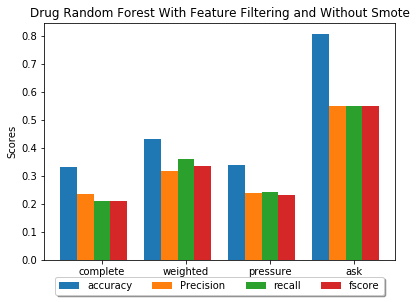

In [27]:
label='Drug'
asklabel='Drug'
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
    res_feat=importance(result,result_labels)
    wei_feat=importance(weighted,weighted_labels)
    blood_feat=importance(blood,blood_labels)
    ask_feat=importance(ask,ask_labels)
    res_acc,res_scores=randomForest(pd.DataFrame(result)[res_feat],result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(pd.DataFrame(weighted)[wei_feat],weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(pd.DataFrame(blood)[blood_feat],blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(pd.DataFrame(ask)[ask_feat],ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)

'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''

x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest With Feature Filtering and Without Smote",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)


import os.path
if not os.path.exists('Forrest_StatsSmotelessImportanceTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsSmotelessImportanceTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsSmotelessImportanceTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsSmotelessImportanceTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

### Random Forest Classifier Function 10-Fold

In [24]:
def average(scores):
    FScore=0
    Recall=0
    Precision=0

    for i in scores:
        Precision+=i[0]
        Recall+=i[1]
        FScore+=i[2]
    return (Precision/10,Recall/10,FScore/10)

In [25]:
def randomForest10Fold(result,result_labels,estimators,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result[train_index], result[test_index], result_labels[train_index],result_labels[test_index]
        clf = RandomForestClassifier(n_estimators=estimators, max_depth=2,random_state=0)
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

In [26]:
def randomForest10FoldNotSmote(result,result_labels,estimators,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels[train_index],result_labels[test_index]
        clf = RandomForestClassifier(n_estimators=estimators, max_depth=2,random_state=0)
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

### Random Forest with 10-Fold Cross Validation

In [62]:
label='Drug'
asklabel='Drug'

res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
    res_acc,res_scores=randomForest10Fold(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest10Fold(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest10Fold(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest10Fold(ask,ask_labels,1000,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
writer = pd.ExcelWriter('ForrestFold_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()

Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({0: 51, 2: 51, 1: 51, 3: 51})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklea

Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 622})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

Res: Accuracy: 0.040860215053763436 # Scores: (0.0577160843723052, 0.03433366000595907, 0.027965711503169705)
Wei: Accuracy: 0.19166666666666665 # Scores: (0.27375000000000005, 0.12514515455304928, 0.13567045608712275)
Bld: Accuracy: 0.0838709677419355 # Scores: (0.1151192093347266, 0.09026073968184188, 0.05673552273552272)
Ask: Accuracy: 0.6203483870967742 # Scores: (0.5022222222222222, 0.35988995240613425, 0.3800583199425489)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({0: 51, 2: 51, 1: 51, 3: 51})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklea

Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 622})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

Res: Accuracy: 0.03870967741935484 # Scores: (0.058589794104641935, 0.03303424704951881, 0.027000651306221934)
Wei: Accuracy: 0.18666666666666665 # Scores: (0.28208333333333335, 0.12472848788638262, 0.13852061827061823)
Bld: Accuracy: 0.08387096774193549 # Scores: (0.1190058944886531, 0.08914740288889947, 0.05660295847576534)
Ask: Accuracy: 0.6203483870967742 # Scores: (0.5022222222222222, 0.35988995240613425, 0.3800583199425489)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({0: 51, 2: 51, 1: 51, 3: 51})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklea

Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 622})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

Res: Accuracy: 0.034408602150537634 # Scores: (0.05583346339244706, 0.030510774566491226, 0.0246955079626585)
Wei: Accuracy: 0.17190476190476192 # Scores: (0.25604166666666667, 0.11138027360066834, 0.11690708233227416)
Bld: Accuracy: 0.08279569892473118 # Scores: (0.1199230399230399, 0.08509438061954636, 0.057156393309537076)
Ask: Accuracy: 0.6203483870967742 # Scores: (0.5022222222222222, 0.35988995240613425, 0.3800583199425489)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({0: 51, 2: 51, 1: 51, 3: 51})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklea

Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 622})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

Res: Accuracy: 0.031451612903225803 # Scores: (0.05805597219800536, 0.028847666057225933, 0.023731659972265708)
Wei: Accuracy: 0.16666666666666669 # Scores: (0.2348611111111111, 0.10659226190476193, 0.11400317766206511)
Bld: Accuracy: 0.08494623655913978 # Scores: (0.11969755692329273, 0.09022882878008147, 0.057215588995930114)
Ask: Accuracy: 0.6203483870967742 # Scores: (0.5022222222222222, 0.35988995240613425, 0.3800583199425489)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({0: 51, 2: 51, 1: 51, 3: 51})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklea

Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 622})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

Res: Accuracy: 0.03494623655913979 # Scores: (0.05667526617526617, 0.030822885534973216, 0.025327514244868198)
Wei: Accuracy: 0.1869047619047619 # Scores: (0.25604166666666667, 0.115203373015873, 0.12197790882758577)
Bld: Accuracy: 0.08279569892473118 # Scores: (0.11845343315184513, 0.08542882878008147, 0.055962265206394676)
Ask: Accuracy: 0.6203483870967742 # Scores: (0.5022222222222222, 0.35988995240613425, 0.3800583199425489)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({0: 51, 2: 51, 1: 51, 3: 51})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklea

Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 622})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

Res: Accuracy: 0.03198924731182796 # Scores: (0.0578118202470127, 0.029241040798426758, 0.02398532060430983)
Wei: Accuracy: 0.1869047619047619 # Scores: (0.2552380952380952, 0.115203373015873, 0.12248852974261845)
Bld: Accuracy: 0.08064516129032259 # Scores: (0.11995257621031355, 0.0842340660959571, 0.05422967195747939)
Ask: Accuracy: 0.6203483870967742 # Scores: (0.5022222222222222, 0.35988995240613425, 0.3800583199425489)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({0: 51, 2: 51, 1: 51, 3: 51})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklea

Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 622})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

Res: Accuracy: 0.031451612903225803 # Scores: (0.05882189239332096, 0.02903400146095264, 0.023773025232616714)
Wei: Accuracy: 0.19190476190476188 # Scores: (0.2552380952380952, 0.11673115079365079, 0.12502352335312691)
Bld: Accuracy: 0.08064516129032259 # Scores: (0.11910055469995502, 0.0842340660959571, 0.05416400976979725)
Ask: Accuracy: 0.6203483870967742 # Scores: (0.5022222222222222, 0.35988995240613425, 0.3800583199425489)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({0: 51, 2: 51, 1: 51, 3: 51})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 622})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

KeyboardInterrupt: 

In [28]:
label='Drug'
asklabel='Drug'

res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
    res_acc,res_scores=randomForest10FoldNotSmote(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest10FoldNotSmote(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest10FoldNotSmote(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest10FoldNotSmote(ask,ask_labels,1000,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)

writer = pd.ExcelWriter('ForrestFold_Stats'+label+'smoteless.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()

Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({3: 51, 1: 45, 0: 14, 2: 13})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\A

Res: Accuracy: 0.29743589743589743 # Scores: (0.18992165242165243, 0.18247863247863247, 0.1732300670328386)
Wei: Accuracy: 0.23205128205128203 # Scores: (0.3833333333333333, 0.14305555555555555, 0.1787129537129537)
Bld: Accuracy: 0.2565217391304348 # Scores: (0.18609385783298826, 0.16732542819499344, 0.14974859287054412)
Ask: Accuracy: 0.8213333333333332 # Scores: (0.8106666666666668, 0.85, 0.8175824175824176)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({3: 51, 1: 45, 0: 14, 2: 13})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.3038461538461538 # Scores: (0.19026806526806528, 0.1857905982905983, 0.17612605878432327)
Wei: Accuracy: 0.24935897435897436 # Scores: (0.3833333333333333, 0.15277777777777776, 0.18757742257742255)
Bld: Accuracy: 0.2434782608695652 # Scores: (0.18582930756843802, 0.16179183135704875, 0.14500614812456422)
Ask: Accuracy: 0.8213333333333332 # Scores: (0.8106666666666668, 0.85, 0.8175824175824176)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({3: 51, 1: 45, 0: 14, 2: 13})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.3057692307692308 # Scores: (0.19038461538461537, 0.18707264957264957, 0.17659160287327247)
Wei: Accuracy: 0.2653846153846154 # Scores: (0.3833333333333333, 0.1597222222222222, 0.19638479167890932)
Bld: Accuracy: 0.25000000000000006 # Scores: (0.1860144927536232, 0.1643939393939394, 0.1473470737275866)
Ask: Accuracy: 0.8213333333333332 # Scores: (0.8106666666666668, 0.85, 0.8175824175824176)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({3: 51, 1: 45, 0: 14, 2: 13})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.30256410256410254 # Scores: (0.19038461538461537, 0.18557692307692308, 0.17534728765648136)
Wei: Accuracy: 0.241025641025641 # Scores: (0.3333333333333333, 0.1486111111111111, 0.17770347299759065)
Bld: Accuracy: 0.24565217391304345 # Scores: (0.1859267734553776, 0.1625494071146245, 0.14577419727971014)
Ask: Accuracy: 0.8213333333333332 # Scores: (0.8106666666666668, 0.85, 0.8175824175824176)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({3: 51, 1: 45, 0: 14, 2: 13})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.30128205128205127 # Scores: (0.19049955791335102, 0.18472222222222223, 0.1753320330181271)
Wei: Accuracy: 0.2570512820512821 # Scores: (0.3833333333333333, 0.15555555555555556, 0.18979138508550275)
Bld: Accuracy: 0.2456521739130435 # Scores: (0.1860144927536232, 0.16222002635046112, 0.14566670843078294)
Ask: Accuracy: 0.8213333333333332 # Scores: (0.8106666666666668, 0.85, 0.8175824175824176)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({3: 51, 1: 45, 0: 14, 2: 13})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.3019230769230769 # Scores: (0.19038461538461537, 0.18493589743589745, 0.1755328566935753)
Wei: Accuracy: 0.2730769230769231 # Scores: (0.3833333333333333, 0.1625, 0.20019431548843314)
Bld: Accuracy: 0.24347826086956523 # Scores: (0.1859267734553776, 0.1614624505928854, 0.14492266081173533)
Ask: Accuracy: 0.8213333333333332 # Scores: (0.8106666666666668, 0.85, 0.8175824175824176)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({3: 51, 1: 45, 0: 14, 2: 13})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.30256410256410254 # Scores: (0.19015939015939015, 0.18536324786324787, 0.1754451583757885)
Wei: Accuracy: 0.2564102564102564 # Scores: (0.3833333333333333, 0.15416666666666665, 0.18918914418914418)
Bld: Accuracy: 0.24347826086956523 # Scores: (0.1859267734553776, 0.1614624505928854, 0.14492266081173533)
Ask: Accuracy: 0.8213333333333332 # Scores: (0.8106666666666668, 0.85, 0.8175824175824176)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({3: 51, 1: 45, 0: 14, 2: 13})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Res: Accuracy: 0.3006410256410256 # Scores: (0.19027123669980814, 0.1844017094017094, 0.1748543573651819)
Wei: Accuracy: 0.2564102564102564 # Scores: (0.3833333333333333, 0.15416666666666665, 0.18918914418914418)
Bld: Accuracy: 0.2434782608695652 # Scores: (0.18582930756843802, 0.16179183135704875, 0.1448304858852112)
Ask: Accuracy: 0.8213333333333332 # Scores: (0.8106666666666668, 0.85, 0.8175824175824176)
Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({3: 51, 1: 45, 0: 14, 2: 13})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({1: 622, 0: 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.3006410256410256 # Scores: (0.19050116550116553, 0.1842948717948718, 0.17522787269238935)
Wei: Accuracy: 0.25641025641025644 # Scores: (0.3833333333333333, 0.15416666666666667, 0.19262465604570866)
Bld: Accuracy: 0.2434782608695652 # Scores: (0.18582930756843802, 0.16179183135704875, 0.1448304858852112)
Ask: Accuracy: 0.8213333333333332 # Scores: (0.8106666666666668, 0.85, 0.8175824175824176)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [29]:
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)

Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


### SVM Classifier Function

In [30]:
def SVM(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    print(Counter(result_labels))
    clf = SVC(gamma='auto')
    clf.fit(X_train, Y_train)
    pred=clf.predict(X_test)
    accuracy=(accuracy_score(Y_test, pred))
    #print (accuracy)
    scores_rf=(precision_recall_fscore_support(Y_test,pred, average='macro'))
    #print(DataSet)
    #print (pred)
    #print(classification_report(Y_test,pred,labels=[0,1,2]))
        
    return accuracy,scores_rf

### SVM  

In [31]:
label='Drug'
asklabel='Drug'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=SVM(result,result_labels,"Result")
wei_acc,wei_scores=SVM(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats'+label+'.xlsx') 


Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.4435483870967742 # Scores: (0.4367576008235556, 0.44580533165834485, 0.4321639667561777, None)
Wei: Accuracy: 0.3870967741935484 # Scores: (0.4148046398046398, 0.3903186274509804, 0.3908529064779065, None)
Bld: Accuracy: 0.5125448028673835 # Scores: (0.5098803827550054, 0.5152923976608187, 0.5107075903351157, None)
Ask: Accuracy: 0.7540106951871658 # Scores: (0.7614743308468627, 0.75572912196378, 0.7529935391241924, None)


In [32]:
label='Drug'
asklabel='Drug'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=SVM(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=SVM(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=SVM(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats'+label+'importance.xlsx') 

Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.3172043010752688 # Scores: (0.3240786053191363, 0.31883531732898307, 0.3088682911441292, None)
Wei: Accuracy: 0.41935483870967744 # Scores: (0.49019607843137253, 0.4131827731092437, 0.4135262725779967, None)
Bld: Accuracy: 0.4767025089605735 # Scores: (0.5132295023272467, 0.48190545808966867, 0.4744494032224463, None)
Ask: Accuracy: 0.7165775401069518 # Scores: (0.7846464646464646, 0.7217120132749693, 0.7015208552928776, None)


In [33]:
label='Drug'
asklabel='Drug'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=SVM(result,result_labels,"Result")
wei_acc,wei_scores=SVM(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats'+label+'smoteless.xlsx') 


Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.4230769230769231 # Scores: (0.13579002500172935, 0.1892402338596564, 0.14871326725786818, None)
Wei: Accuracy: 0.35135135135135137 # Scores: (0.18369565217391304, 0.22916666666666666, 0.1997607655502392, None)
Bld: Accuracy: 0.32608695652173914 # Scores: (0.2604915514592934, 0.223291040682345, 0.2016501814989368, None)
Ask: Accuracy: 0.8810572687224669 # Scores: (0.7752976190476191, 0.5332017229002154, 0.5326012354152367, None)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
label='Drug'
asklabel='Drug'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=SVM(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=SVM(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=SVM(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats'+label+'importancesmoteless.xlsx') 


Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.37393162393162394 # Scores: (0.2882345808746261, 0.18438292060339304, 0.16067061928683019, None)
Wei: Accuracy: 0.40540540540540543 # Scores: (0.23214285714285715, 0.2625, 0.22286821705426357, None)
Bld: Accuracy: 0.3115942028985507 # Scores: (0.2079185520361991, 0.20991311426094034, 0.1697056277056277, None)
Ask: Accuracy: 0.8502202643171806 # Scores: (0.5008561643835616, 0.5002692031586504, 0.4871079213184476, None)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM 10-Fold Function

In [35]:
def SVM10Fold(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result[train_index], result[test_index], result_labels[train_index],result_labels[test_index]
        clf = SVC(gamma='auto')
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

In [40]:
def SVM10FoldNoSmote(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)
    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels[train_index],result_labels[test_index]
        clf = SVC(gamma='auto')
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

### SVM 10-Fold

In [41]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='DrugFamily'
asklabel='DrugFamily'
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=SVM10Fold(result,result_labels,"Result")
wei_acc,wei_scores=SVM10Fold(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM10Fold(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM10Fold(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats10Fold'+label+'.xlsx') 

Counter({'Beta': 739, 'Angiotensin': 428, 'Calcium': 261, 'Diuretics': 129})
Counter({'Angiotensin': 51, 'Beta': 45, 'Calcium': 14, 'Diuretics': 13})
Counter({'Beta': 186, 'Angiotensin': 134, 'Calcium': 89, 'Diuretics': 51})
Counter({'Angiotensin': 622, 'Beta': 134})
Counter({2: 739, 3: 739, 1: 739, 0: 739})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

Counter({2: 51, 3: 51, 1: 51, 0: 51})
Counter({2: 186, 3: 186, 1: 186, 0: 186})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

Counter({0: 622, 1: 622})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

Res: Accuracy: 0.20168117269812186 # Scores: (0.28083773341812057, 0.10982860057253067, 0.12451004657680309)
Wei: Accuracy: 0.2647619047619047 # Scores: (0.27130952380952383, 0.12747284878863824, 0.13682150202115878)
Bld: Accuracy: 0.3081981981981982 # Scores: (0.2870208394976197, 0.13634607286112532, 0.1565449975482354)
Ask: Accuracy: 0.6933806451612903 # Scores: (0.5035714285714286, 0.396518455843469, 0.4118479277382098)


In [42]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='DrugFamily'
asklabel='DrugFamily'
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=SVM10FoldNoSmote(result,result_labels,"Result")
wei_acc,wei_scores=SVM10FoldNoSmote(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM10FoldNoSmote(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM10FoldNoSmote(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats10Fold'+label+'smoteless.xlsx') 

Counter({'Beta': 739, 'Angiotensin': 428, 'Calcium': 261, 'Diuretics': 129})
Counter({'Angiotensin': 51, 'Beta': 45, 'Calcium': 14, 'Diuretics': 13})
Counter({'Beta': 186, 'Angiotensin': 134, 'Calcium': 89, 'Diuretics': 51})
Counter({'Angiotensin': 622, 'Beta': 134})
Counter({1: 739, 0: 428, 2: 261, 3: 129})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\sit

Counter({0: 51, 1: 45, 2: 14, 3: 13})
Counter({1: 186, 0: 134, 2: 89, 3: 51})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklea

Counter({0: 622, 1: 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklea

Res: Accuracy: 0.4222415219189413 # Scores: (0.25204316051386305, 0.23149066380773697, 0.21973955960348884)
Wei: Accuracy: 0.22435897435897437 # Scores: (0.26666666666666666, 0.12916666666666668, 0.13827731092436973)
Bld: Accuracy: 0.17608695652173917 # Scores: (0.19981617647058822, 0.06714834499844612, 0.06724216651438637)
Ask: Accuracy: 0.8173859649122808 # Scores: (0.6606666666666666, 0.6980263157894736, 0.6665890400989739)


In [43]:
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)

Counter({'Beta': 739, 'Angiotensin': 428, 'Calcium': 261, 'Diuretics': 129})
Counter({'Angiotensin': 51, 'Beta': 45, 'Calcium': 14, 'Diuretics': 13})
Counter({'Beta': 186, 'Angiotensin': 134, 'Calcium': 89, 'Diuretics': 51})
Counter({'Angiotensin': 622, 'Beta': 134})


### Naive Bayes Function

In [44]:
def NB(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    print(Counter(result_labels))
    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    pred=clf.predict(X_test)
    accuracy=(accuracy_score(Y_test, pred))
    #print (accuracy)
    scores_rf=(precision_recall_fscore_support(Y_test,pred, average='macro'))
    #print(DataSet)
    #print (pred)
    #print(classification_report(Y_test,pred,labels=[0,1,2]))
        
    return accuracy,scores_rf

### Naive Bayes 

In [45]:
label='Drug'
asklabel='Drug'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=NB(result,result_labels,"Result")
wei_acc,wei_scores=NB(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'.xlsx') 

Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.3055555555555556 # Scores: (0.36439119053754726, 0.3101047653946964, 0.27366199498300997, None)
Wei: Accuracy: 0.45161290322580644 # Scores: (0.4540229885057471, 0.454578081232493, 0.4142292490118577, None)
Bld: Accuracy: 0.3655913978494624 # Scores: (0.38933929707611514, 0.35494639376218323, 0.33331805217284177, None)
Ask: Accuracy: 0.7219251336898396 # Scores: (0.7578153072224219, 0.7258032214688296, 0.7140672782874619, None)


In [46]:
label='Drug'
asklabel='Drug'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=NB(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=NB(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=NB(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=NB(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'importance.xlsx') 

Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 620, 2: 620, 3: 620, 1: 620, 4: 620, 5: 620})
Counter({0: 51, 2: 51, 1: 51, 3: 51})
Counter({0: 186, 2: 186, 3: 186, 1: 186, 4: 186})
Counter({1: 622, 0: 622})
Res: Accuracy: 0.2517921146953405 # Scores: (0.2508154971899532, 0.25090672397319363, 0.23690136449703847, None)
Wei: Accuracy: 0.4032258064516129 # Scores: (0.44052419354838707, 0.40653886554621854, 0.3813438735177866, None)
Bld: Accuracy: 0.3906810035842294 # Scores: (0.3686728274787062, 0.3921637426900585, 0.3453329065510116, None)
Ask: Accuracy: 0.6925133689839572 # Scores: (0.8010221760221761, 0.6988384401911137, 0.6662035995064066, None)


In [47]:
label='Drug'
asklabel='Drug'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=NB(result,result_labels,"Result")
wei_acc,wei_scores=NB(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'smoteless.xlsx') 

Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})
Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.27136752136752135 # Scores: (0.22805096506589043, 0.25728075248252413, 0.21574051320280485, None)
Wei: Accuracy: 0.24324324324324326 # Scores: (0.2579365079365079, 0.31666666666666665, 0.22435897435897434, None)
Bld: Accuracy: 0.18840579710144928 # Scores: (0.27184684684684685, 0.21605439648917907, 0.19481042421777603, None)
Ask: Accuracy: 0.6960352422907489 # Scores: (0.5898477591515566, 0.6885319454414932, 0.5781464623340247, None)


In [48]:
label='Drug'
asklabel='Drug'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=NB(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=NB(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=NB(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=NB(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'importancesmoteless.xlsx') 


Counter({'Atenolol': 620, 'Lisinopril': 428, 'Amlodipine': 161, 'Hydrochlorothiazide': 129, 'Nadolol': 119, 'Diltiazem': 100})
Counter({'Lisinopril': 51, 'Atenolol': 45, 'Amlodipine': 14, 'Hydrochlorothiazide': 13})
Counter({'Atenolol': 186, 'Lisinopril': 134, 'Amlodipine': 63, 'Hydrochlorothiazide': 51, 'Diltiazem': 26})
Counter({'Lisinopril': 622, 'Atenolol': 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 620, 4: 428, 0: 161, 3: 129, 5: 119, 2: 100})
Counter({3: 51, 1: 45, 0: 14, 2: 13})
Counter({1: 186, 4: 134, 0: 63, 3: 51, 2: 26})
Counter({1: 622, 0: 134})
Res: Accuracy: 0.41239316239316237 # Scores: (0.12607833933135137, 0.18181755058395477, 0.1392566782810685, None)
Wei: Accuracy: 0.40540540540540543 # Scores: (0.2272727272727273, 0.275, 0.24662162162162163, None)
Bld: Accuracy: 0.32608695652173914 # Scores: (0.2858749021561232, 0.23889862150731717, 0.21709442688847722, None)
Ask: Accuracy: 0.5066079295154186 # Scores: (0.5922081094284318, 0.7032483847810481, 0.46820615796519416, None)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Naive Bayes 10-Fold Function

In [49]:
def NB10Fold(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result[train_index], result[test_index], result_labels[train_index],result_labels[test_index]
        clf = GaussianNB()
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

In [50]:
def NB10FoldNoSmote(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels[train_index],result_labels[test_index]
        clf = GaussianNB()
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

### Naive Bayes 10-Fold

In [51]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='DrugFamily'
asklabel='DrugFamily'
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=NB10Fold(result,result_labels,"Result")
wei_acc,wei_scores=NB10Fold(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB10Fold(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB10Fold(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats10Fold'+label+'.xlsx') 

Counter({'Beta': 739, 'Angiotensin': 428, 'Calcium': 261, 'Diuretics': 129})
Counter({'Angiotensin': 51, 'Beta': 45, 'Calcium': 14, 'Diuretics': 13})
Counter({'Beta': 186, 'Angiotensin': 134, 'Calcium': 89, 'Diuretics': 51})
Counter({'Angiotensin': 622, 'Beta': 134})
Counter({2: 739, 3: 739, 1: 739, 0: 739})
Counter({2: 51, 3: 51, 1: 51, 0: 51})
Counter({2: 186, 3: 186, 1: 186, 0: 186})
Counter({0: 622, 1: 622})
Res: Accuracy: 0.39831195602382047 # Scores: (0.3085599129502049, 0.1733916566191306, 0.1786742092069412)
Wei: Accuracy: 0.43547619047619046 # Scores: (0.387844304388422, 0.2976629072681704, 0.29369561991452675)
Bld: Accuracy: 0.45228828828828826 # Scores: (0.31875046908715643, 0.19632877903491758, 0.2213011835791415)
Ask: Accuracy: 0.7602129032258065 # Scores: (0.5027777777777778, 0.4298817028027499, 0.431806107854796)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

In [52]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='DrugFamily'
asklabel='DrugFamily'
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=NB10FoldNoSmote(result,result_labels,"Result")
wei_acc,wei_scores=NB10FoldNoSmote(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB10FoldNoSmote(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB10FoldNoSmote(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats10Fold'+label+'smoteless.xlsx') 

Counter({'Beta': 739, 'Angiotensin': 428, 'Calcium': 261, 'Diuretics': 129})
Counter({'Angiotensin': 51, 'Beta': 45, 'Calcium': 14, 'Diuretics': 13})
Counter({'Beta': 186, 'Angiotensin': 134, 'Calcium': 89, 'Diuretics': 51})
Counter({'Angiotensin': 622, 'Beta': 134})
Counter({1: 739, 0: 428, 2: 261, 3: 129})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

Counter({0: 51, 1: 45, 2: 14, 3: 13})
Counter({1: 186, 0: 134, 2: 89, 3: 51})
Counter({0: 622, 1: 134})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\class

Res: Accuracy: 0.31732009925558313 # Scores: (0.2537050077543929, 0.10473894197866754, 0.13470876641368232)
Wei: Accuracy: 0.10769230769230768 # Scores: (0.16333333333333333, 0.052083333333333336, 0.05348901098901099)
Bld: Accuracy: 0.35 # Scores: (0.2672463768115942, 0.10546315203165557, 0.1381595457994706)
Ask: Accuracy: 0.650701754385965 # Scores: (0.5319444444444444, 0.3576001709782932, 0.41652369567419384)


In [53]:
'''from collections import Counter
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[0, 1,3])
X_res, y_res = sm.fit_resample(result, result_labels)
print(Counter(result_labels))
print(Counter(y_res))
print(X_res)
print(y_res)
print(result_labels)'''

'from collections import Counter\nfrom imblearn.over_sampling import SMOTENC\nsm = SMOTENC(random_state=42, categorical_features=[0, 1,3])\nX_res, y_res = sm.fit_resample(result, result_labels)\nprint(Counter(result_labels))\nprint(Counter(y_res))\nprint(X_res)\nprint(y_res)\nprint(result_labels)'

In [54]:
#average(wei_scores)

In [ ]:
res_scores[0]

In [ ]:
wei_acc


In [ ]:
ask_acc

In [ ]:
res_scores

In [ ]:
wei_scores

In [ ]:
ask_scores